In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/content/Dhaka Rent (1).csv", sep=';')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
#Dependent rent, y
#Independent area, x
x = df.drop('rent', axis=1)

In [5]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [6]:
x.shape

(60, 1)

In [ ]:
# x = df[['area']]

In [ ]:
#df.drop('rent', axis=1, inplace=True) #ignore

In [7]:
y = df['rent']
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


# viz

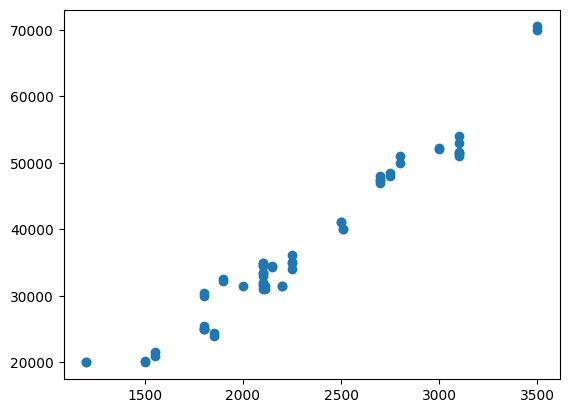

In [8]:
plt.scatter(x, y)

Text(0, 0.5, 'Rent in Taka')

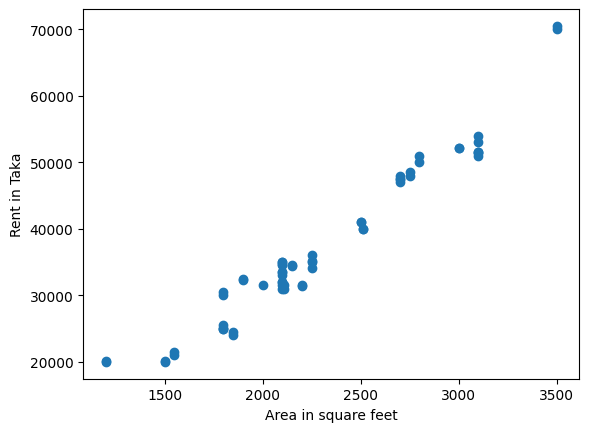

In [9]:
plt.scatter(x, y)
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Taka')

In [10]:
x.mean()

,0
area,2289.0


In [11]:
y.mean()

37269.166666666664

# Data Split

In [12]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(df, test_size=.30)

In [13]:
train.head()

,area,rent
57,1800,25100
13,2510,40050
20,2110,31500
46,1800,30000
14,2250,34100


In [14]:
train.shape

(42, 2)

In [15]:
df.shape

(60, 2)

In [16]:
test.shape

(18, 2)

# Seperate train and test for xtrain, xtest, ytrain, ytest

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state=42)

In [18]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


In [19]:
ytrain.head()

,rent
40,34400
4,52100
43,40000
19,47000
34,52200


# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [21]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [22]:
reg.coef_

array([20.68636687])

In [23]:
reg.intercept_

-10252.90474033673

In [24]:
reg.predict([[2510]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41669.87610729])

In [25]:
#Y = (M*X) + C
Y = ((reg.coef_)*2510)+(reg.intercept_)
Y

array([41669.87610729])

# SAVE ML models

In [26]:
import pickle as pk
import joblib as jb

In [27]:
with open('lr1', 'wb') as files: #saving
    pk.dump(reg, files)

In [28]:
with open('lr1', 'rb') as file: #reading
    reg1 = pk.load(file)

In [29]:
reg.predict([[2510]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41669.87610729])

# Joblib

In [30]:
jb.dump(reg, 'lr2')

['lr2']

In [31]:
reg2 = jb.load('lr2')

In [32]:
reg2.predict([[2510]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41669.87610729])